In [1]:
import pandas as pd
import glob
import re
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [2]:
fList=glob.glob('logs/DAQ_logs/lc-ASIC*16mar_1510*csv')
fList

['logs/DAQ_logs/lc-ASIC_16mar_151007.csv']

In [3]:
f=fList[0]
f

'logs/DAQ_logs/lc-ASIC_16mar_151007.csv'

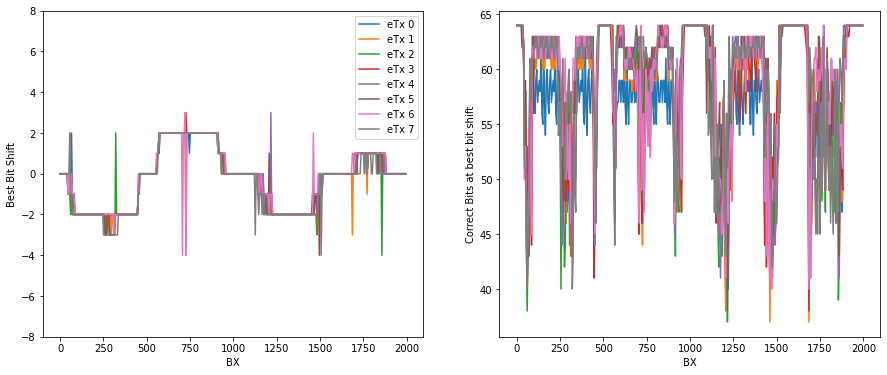

In [4]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
bx=range(1,2000,5)
dfASIC=pd.read_csv(f)
dfEm=pd.read_csv(f.replace('ASIC','emulator'))

bits_ASIC=np.array([[*f"{int(''.join(x),16):0256b}"] for x in dfASIC.values[:,:8]],dtype=int)
bits_Em=np.array([[*f"{int(''.join(x),16):0256b}"] for x in dfEm.values[:,:8]],dtype=int)


shifts=[]
biterrors=[]
for j in range(8):
    eTx0_ASIC=bits_ASIC[:,j*32:(j+1)*32][::-1].flatten()[::-1]
    eTx0_em=bits_Em[:,j*32:(j+1)*32][::-1].flatten()[::-1]

    y=[]
    y2=[]
    p=4
    for k in bx:
        n=k*32
        a=eTx0_em[n:n+64]
        b=np.array([eTx0_ASIC[n+i-p:n+64+i-p] for i in range(2*p)])
        y.append((a==b).sum(axis=1).argmax())
        y2.append((a==b).sum(axis=1).max())
    #     print(j,(a==b).sum(axis=1).argmax(),(a==b).sum(axis=1).max())
    y=np.array(y)-p
    ax[0].plot(bx,y,label=f'eTx {j}')
    ax[1].plot(bx,y2)
    shifts.append(y)
    biterrors.append(y2)
ax[0].set_ylim(-8,8)
ax[0].set_xlabel('BX')
ax[1].set_xlabel('BX')
ax[0].set_ylabel('Best Bit Shift')
ax[1].set_ylabel('Correct Bits at best bit shift')
ax[0].legend()

In [5]:
for N in range(40,120,10):
    print(N)
    print('ASIC: '+''.join(list(eTx0_ASIC.astype('<U1')))[N*32:(N+3)*32])
    print('Emul: '+''.join(list(eTx0_em.astype('<U1')))[N*32:(N+3)*32])
    
    print()
    
for N in range(600,720,10):
    print(N)
    print('ASIC: '+''.join(list(eTx0_ASIC.astype('<U1')))[N*32:(N+3)*32])
    print('Emul: '+''.join(list(eTx0_em.astype('<U1')))[N*32:(N+3)*32])
    
    print()

40
ASIC: 111110001111000111100111110001110111101011110101111010111101011111111001111100111110111111011111
Emul: 011110001111000111100011110001110111101011110101111010111101011111111001111100111110011111001111

50
ASIC: 100001011000101000000110011111011100111110011111011111100111110001100100010000001011001001100100
Emul: 110001011000101100010110001011001100011110001111000111100011110000100100010010001001000100100010

60
ASIC: 011101000111000110000011111000100111111001111001111000111111001001111111011111011111001111011010
Emul: 000101000010100001010000101000010001011000101100010110001011000110010101001010100101010010101001

70
ASIC: 111111111111010111110110100101101111111111111111111111101011011111111011110101111110111010001111
Emul: 101101010110101011010101101010111011011101101110110111011011101101110100111010011101001110100111

80
ASIC: 001110100110010011001001100010010011101001110100111010011010100100111110011011001101100110110001
Emul: 010011001001100100110010011001000100111010011101

Text(0, 0.5, 'Stream Compare Agreement')

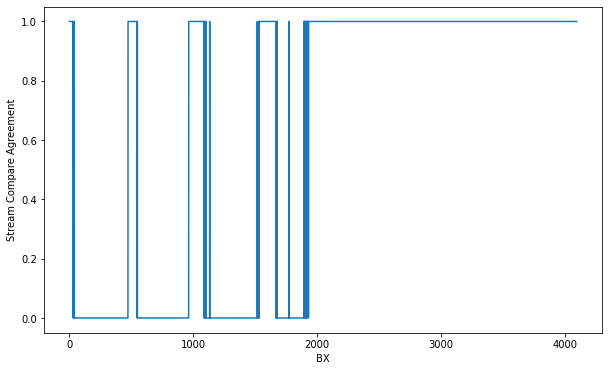

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
ax.plot((dfASIC.values[:,:8]==dfEm.values[:,:8]).all(axis=1))
# ax.set_xlim(0,1200)
ax.set_xlabel('BX')
ax.set_ylabel('Stream Compare Agreement')
